# CAR PRICE PREDICTION
Problem Statement With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model. This project contains two phase-

Data Collection Phase I have done web scraping to collect the data of used cars from the well known website www.cardekho.com and fetched data for different locations. As per the requirement of our client we need to build the model to predict the prices of these used cars.

Model Building Phase After collecting the data, I need to build a machine learning model. Before model building we need to do all data pre-processing steps. The complete life cycle of data science that I have used in this project are as follows:

Data Cleaning

Exploratory Data Analysis

Data Pre-processing

Model Building

Model Evaluation

Selecting the best model

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#to import dataset
df = pd.read_excel("cars_final.xlsx") 
df.head()

,Unnamed: 0.1,Unnamed: 0,Car_Brand,Make_Year,Registration_Year,Fuel_Type,Kms_Driven,Engin_Displacement,No_of_Owners,Transmission,insurance_type,Car_Price
0,0,0,2014 Maruti Swift,2014,Nov 2014,Petrol,"22,515 Kms",1197 cc,1st Owner,Manual,Third Party insurance,"4,47,000"
1,1,1,2017 Hyundai Grand i10,2017,Jul 2017,Petrol,"64,176 Kms",1197 cc,1st Owner,Manual,Third Party insurance,"4,60,000"
2,2,2,2018 Hyundai i20,2018,Jan 2019,Petrol,"29,430 Kms",1197 cc,1st Owner,Manual,Third Party insurance,"5,88,000"
3,3,3,2017 Maruti Baleno,2017,Dec 2017,Diesel,"52,596 Kms",1248 cc,1st Owner,Manual,Third Party insurance,"6,10,000"
4,4,4,2017 Hyundai Grand i10,2017,Jan 2018,Petrol,"30,319 Kms",1197 cc,1st Owner,Manual,Third Party insurance,"5,15,000"


# Exploratory Data Analysis (EDA):

In [3]:
#droppping unwanted columns
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
#droppping unwanted columns
df.drop('Unnamed: 0.1',axis=1,inplace=True)

In [5]:
# to check the dataset after dropping unwanted columns
df.head(3)

,Car_Brand,Make_Year,Registration_Year,Fuel_Type,Kms_Driven,Engin_Displacement,No_of_Owners,Transmission,insurance_type,Car_Price
0,2014 Maruti Swift,2014,Nov 2014,Petrol,"22,515 Kms",1197 cc,1st Owner,Manual,Third Party insurance,"4,47,000"
1,2017 Hyundai Grand i10,2017,Jul 2017,Petrol,"64,176 Kms",1197 cc,1st Owner,Manual,Third Party insurance,"4,60,000"
2,2018 Hyundai i20,2018,Jan 2019,Petrol,"29,430 Kms",1197 cc,1st Owner,Manual,Third Party insurance,"5,88,000"


In [6]:
# to check dataset shape
df.shape

(3210, 10)

In [7]:
# to check column names
df.columns

Index(['Car_Brand', 'Make_Year', 'Registration_Year', 'Fuel_Type',
       'Kms_Driven', 'Engin_Displacement', 'No_of_Owners', 'Transmission',
       'insurance_type', 'Car_Price'],
      dtype='object')

In [8]:
# to get basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3210 entries, 0 to 3209
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Car_Brand           3210 non-null   object
 1   Make_Year           3210 non-null   int64 
 2   Registration_Year   3210 non-null   object
 3   Fuel_Type           3210 non-null   object
 4   Kms_Driven          3210 non-null   object
 5   Engin_Displacement  3210 non-null   object
 6   No_of_Owners        3210 non-null   object
 7   Transmission        3210 non-null   object
 8   insurance_type      3210 non-null   object
 9   Car_Price           3210 non-null   object
dtypes: int64(1), object(9)
memory usage: 250.9+ KB


In [9]:
# to check unique values
df.nunique()

Car_Brand              621
Make_Year               13
Registration_Year      134
Fuel_Type                3
Kms_Driven            2082
Engin_Displacement      50
No_of_Owners             4
Transmission            26
insurance_type           5
Car_Price              881
dtype: int64

In [10]:
# to check value count
df['Car_Brand'].value_counts()

2017 Maruti Baleno                 57
2017 Hyundai i20                   53
2016 Maruti Baleno                 50
2018 Maruti Baleno                 44
2015 Hyundai i20                   42
                                   ..
Hyundai I20 1.2 Asta                1
Hyundai I10 Magna 1.2               1
Tata Nexon 1.2 Revotron Xz Plus     1
Mahindra Xuv500 W8 Awd              1
2020 Tata Harrier                   1
Name: Car_Brand, Length: 621, dtype: int64

In [11]:
# to remove year from car brand name
df['Car_Brand'] = df['Car_Brand'].str[4:]

In [12]:
df['No_of_Owners'].value_counts()

1st Owner    2802
2nd Owner     387
3rd Owner      20
0th Owner       1
Name: No_of_Owners, dtype: int64

In [13]:
# to replace 1st owner to 1
df["No_of_Owners"].replace("1st Owner","1",inplace=True)

In [14]:
# to replace 2nd owner to 2
df["No_of_Owners"].replace("2nd Owner","2",inplace=True)

In [15]:
# to replace 3rd owner to 3
df["No_of_Owners"].replace("3rd Owner","3",inplace=True)

In [16]:
# to replace oth owner to 3
df["No_of_Owners"].replace("0th Owner","3",inplace=True)

In [17]:
df['Fuel_Type'].value_counts()

Petrol    2375
Diesel     794
CNG         41
Name: Fuel_Type, dtype: int64

In [18]:
df['Kms_Driven'].value_counts()

1,08,939 Kms    5
49,916 Kms      5
61,924 Kms      4
54,062 Kms      4
34,197 Kms      4
               ..
42,388 Kms      1
1,10,915 Kms    1
11,757 Kms      1
14,565 Kms      1
75,156 Kms      1
Name: Kms_Driven, Length: 2082, dtype: int64

In [19]:
# Replacing kms and "," sign by empty space from the column
df['Kms_Driven'] = df['Kms_Driven'].str.replace('Kms','')
df['Kms_Driven'] = df['Kms_Driven'].str.replace(',','')

In [20]:
df['Engin_Displacement'].value_counts()

1197 cc    901
998 cc     275
1248 cc    212
1198 cc    189
1497 cc    180
1199 cc    144
1591 cc    128
1498 cc    122
999 cc     108
796 cc     100
1582 cc     80
799 cc      71
1373 cc     70
2179 cc     70
1396 cc     65
1462 cc     50
1461 cc     49
1086 cc     46
1598 cc     41
1798 cc     32
1956 cc     26
2498 cc     24
1496 cc     24
1451 cc     23
814 cc      22
1997 cc     20
1368 cc     19
1120 cc     19
1493 cc     18
2393 cc     13
1364 cc     11
2755 cc      8
1186 cc      7
1047 cc      7
1995 cc      5
1330 cc      4
1597 cc      3
2494 cc      3
1968 cc      3
1999 cc      3
1799 cc      3
2354 cc      2
2982 cc      2
1193 cc      2
1298 cc      1
1797 cc      1
2696 cc      1
2143 cc      1
1353 cc      1
3198 cc      1
Name: Engin_Displacement, dtype: int64

In [21]:
# to replace cc with blank space
df['Engin_Displacement'] = df['Engin_Displacement'].str.replace('cc','')

In [22]:
df['Transmission'].value_counts()

Manual       2619
Automatic     546
GJ05            8
UP14            4
UP16            3
DL8C            3
MH01            3
GJ01            3
MH43            2
MH48            2
MH03            2
GJ13            1
GJ07            1
WB02            1
RJ23            1
RJ18            1
RJ14            1
RJ01            1
KA04            1
KA02            1
KA05            1
KA03            1
KA41            1
TS08            1
MH04            1
GJ03            1
Name: Transmission, dtype: int64

In [23]:
# to replace car no. with manual , as show in dataset
df["Transmission"].replace("GJ05","Manual",inplace=True)
df["Transmission"].replace("UP14","Manual",inplace=True)
df["Transmission"].replace("UP16","Manual",inplace=True)
df["Transmission"].replace("GJ01","Manual",inplace=True)            
df["Transmission"].replace("MH01","Manual",inplace=True)            
df["Transmission"].replace("DL8C","Manual",inplace=True)            
df["Transmission"].replace("MH43","Manual",inplace=True)         
df["Transmission"].replace("MH48","Manual",inplace=True)          
df["Transmission"].replace("MH03","Manual",inplace=True)            
df["Transmission"].replace("GJ07","Manual",inplace=True)            
df["Transmission"].replace("RJ14","Manual",inplace=True)            
df["Transmission"].replace("KA04","Manual",inplace=True)           
df["Transmission"].replace("KA05","Manual",inplace=True)         
df["Transmission"].replace("RJ23","Manual",inplace=True)            
df["Transmission"].replace("GJ03","Manual",inplace=True)            
df["Transmission"].replace("KA41","Manual",inplace=True)          
df["Transmission"].replace("KA03","Manual",inplace=True)            
df["Transmission"].replace("WB02","Manual",inplace=True)          
df["Transmission"].replace("TS08","Manual",inplace=True)            
df["Transmission"].replace("GJ13","Manual",inplace=True)            
df["Transmission"].replace("MH04","Manual",inplace=True)   

In [24]:
# to replace car no. with automatic , as show in dataset
df["Transmission"].replace("KA02","Automatic",inplace=True)
df["Transmission"].replace("RJ01","Automatic",inplace=True)
df["Transmission"].replace("RJ18","Automatic",inplace=True)

In [25]:
df['Transmission'].value_counts()

Manual       2661
Automatic     549
Name: Transmission, dtype: int64

In [26]:
df['insurance_type'].value_counts()

Third Party insurance    3120
Not Available              43
Manual                     42
Automatic                   3
Third Party                 2
Name: insurance_type, dtype: int64

In [27]:
# to check for manual in insurance type
df[(df['insurance_type']== 'Manual')]

,Car_Brand,Make_Year,Registration_Year,Fuel_Type,Kms_Driven,Engin_Displacement,No_of_Owners,Transmission,insurance_type,Car_Price
101,Hyundai i20,2017,Apr 2018,Diesel,42845,1396,1,Manual,Manual,"6,42,000"
226,Honda City,2016,May 2016,Petrol,70410,1591,2,Manual,Manual,"5,47,000"
514,Honda Brio,2016,Jan 2017,Petrol,24384,998,1,Manual,Manual,"3,76,000"
534,Hyundai i10,2012,Jan 2013,Petrol,46430,1197,1,Manual,Manual,"2,33,000"
536,Honda Amaze,2018,Jul 2018,Petrol,11839,1197,1,Manual,Manual,"6,32,000"
563,Renault Triber,2016,Mar 2016,Diesel,86512,1498,1,Manual,Manual,"6,28,000"
572,Toyota Innova Crysta,2016,Nov 2016,Diesel,92650,2179,1,Manual,Manual,"8,47,000"
778,,2017,Aug 2017,Diesel,79121,1498,1,Manual,Manual,"6,78,000"
864,,2014,Aug 2014,Diesel,121605,1461,1,Manual,Manual,"3,59,000"
1091,Renault KWID,2019,Jul 2019,Petrol,76110,1197,1,Manual,Manual,"5,60,000"


In [28]:
df[(df['insurance_type']== 'Automatic' )]

,Car_Brand,Make_Year,Registration_Year,Fuel_Type,Kms_Driven,Engin_Displacement,No_of_Owners,Transmission,insurance_type,Car_Price
1969,Renault KWID,2014,Jun 2014,Petrol,59000,998,2,Automatic,Automatic,"3,90,000"
2669,Maruti Celerio,2017,Apr 2017,Petrol,61178,1497,1,Automatic,Automatic,"8,79,000"
2689,Renault KWID,2018,Jan 2019,Petrol,53020,1197,2,Automatic,Automatic,"5,28,900"


In [29]:
# to replace manual to 3rd party insurance
df["insurance_type"].replace("Manual","Third Party",inplace=True)
df["insurance_type"].replace("Automatic","Third Party",inplace=True)
df["insurance_type"].replace("Third Party insurance","Third Party",inplace=True)

In [30]:
df['insurance_type'].value_counts()

Third Party      3167
Not Available      43
Name: insurance_type, dtype: int64

In [31]:
# to drop unnecssary column
df.drop(["Registration_Year"],axis=1,inplace=True)

In [32]:
# Converting the column into float datatype
df.Make_Year = df.Make_Year.astype('float')

# Subtracting the Manufacturing_year from year 2022 to extract the column "Car_age" 
df['Car_age'] = 2022 - df['Make_Year']

# Dropping the column "Manufacturing_year" as we have extracted age of the cars
df.drop(columns = 'Make_Year', inplace = True)

In [33]:
# to convert data type and to remove ','
df.Kms_Driven = df.Kms_Driven.astype('float')
df.Engin_Displacement = df.Engin_Displacement.astype('float')
df['Car_Price'] = df['Car_Price'].str.replace(',','')
df.Car_Price = df.Car_Price.astype('float')

In [34]:
# to check dataset
df

,Car_Brand,Fuel_Type,Kms_Driven,Engin_Displacement,No_of_Owners,Transmission,insurance_type,Car_Price,Car_age
0,Maruti Swift,Petrol,22515.0,1197.0,1,Manual,Third Party,447000.0,8.0
1,Hyundai Grand i10,Petrol,64176.0,1197.0,1,Manual,Third Party,460000.0,5.0
2,Hyundai i20,Petrol,29430.0,1197.0,1,Manual,Third Party,588000.0,4.0
3,Maruti Baleno,Diesel,52596.0,1248.0,1,Manual,Third Party,610000.0,5.0
4,Hyundai Grand i10,Petrol,30319.0,1197.0,1,Manual,Third Party,515000.0,5.0
...,...,...,...,...,...,...,...,...,...
3205,Tata Tiago,Diesel,71835.0,1047.0,1,Manual,Third Party,384000.0,5.0
3206,Maruti Wagon R,Petrol,88899.0,998.0,1,Manual,Third Party,325000.0,7.0
3207,Maruti Swift,Diesel,66362.0,1248.0,1,Manual,Third Party,457000.0,6.0
3208,Tata Nexon,Petrol,13395.0,1198.0,1,Automatic,Third Party,776000.0,3.0


In [35]:
#to check datatype
df.dtypes

Car_Brand              object
Fuel_Type              object
Kms_Driven            float64
Engin_Displacement    float64
No_of_Owners           object
Transmission           object
insurance_type         object
Car_Price             float64
Car_age               float64
dtype: object

In [36]:
# to check for null values
df.isnull().sum()

Car_Brand             0
Fuel_Type             0
Kms_Driven            0
Engin_Displacement    0
No_of_Owners          0
Transmission          0
insurance_type        0
Car_Price             0
Car_age               0
dtype: int64

In [37]:
#to get statistical details about dataset
df.describe()

,Kms_Driven,Engin_Displacement,Car_Price,Car_age
count,3210.000000,3210.000000,3.210000e+03,3210.000000
mean,49976.620872,1298.005296,6.243485e+05,5.461994
std,27128.898023,312.450353,3.420624e+05,2.195768
min,600.000000,796.000000,1.850000e+05,0.000000
25%,29133.250000,1197.000000,4.030000e+05,4.000000
50%,46804.000000,1198.000000,5.400000e+05,5.000000
75%,68713.000000,1493.000000,7.447500e+05,7.000000
max,138178.000000,3198.000000,5.390000e+06,12.000000


# visualisation

In [38]:
# to check for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Car_Brand', 'Fuel_Type', 'No_of_Owners', 'Transmission', 'insurance_type']


In [39]:
# to check for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Kms_Driven', 'Engin_Displacement', 'Car_Price', 'Car_age']


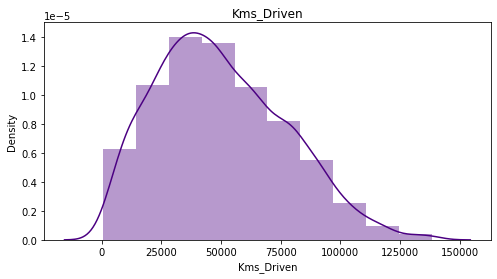

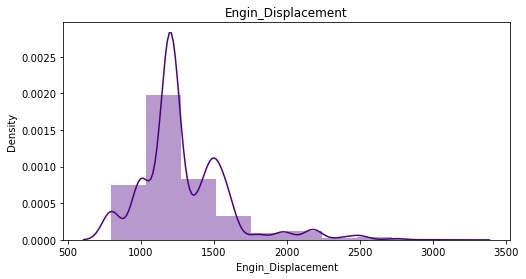

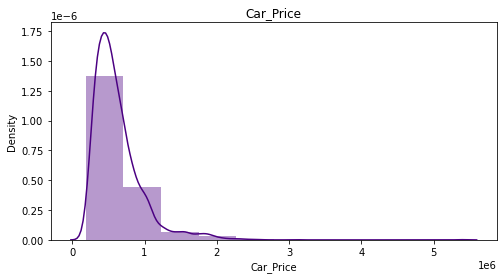

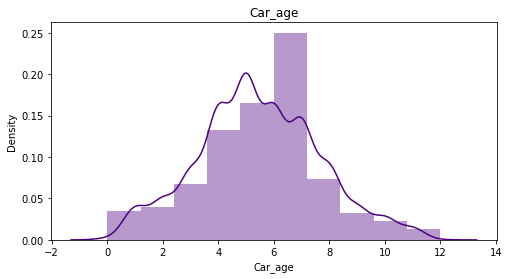

In [40]:
#Distribution plot for all numerical columns
for i in df[numerical_columns]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 10, color="indigo")
    plt.title(i)
    plt.show()

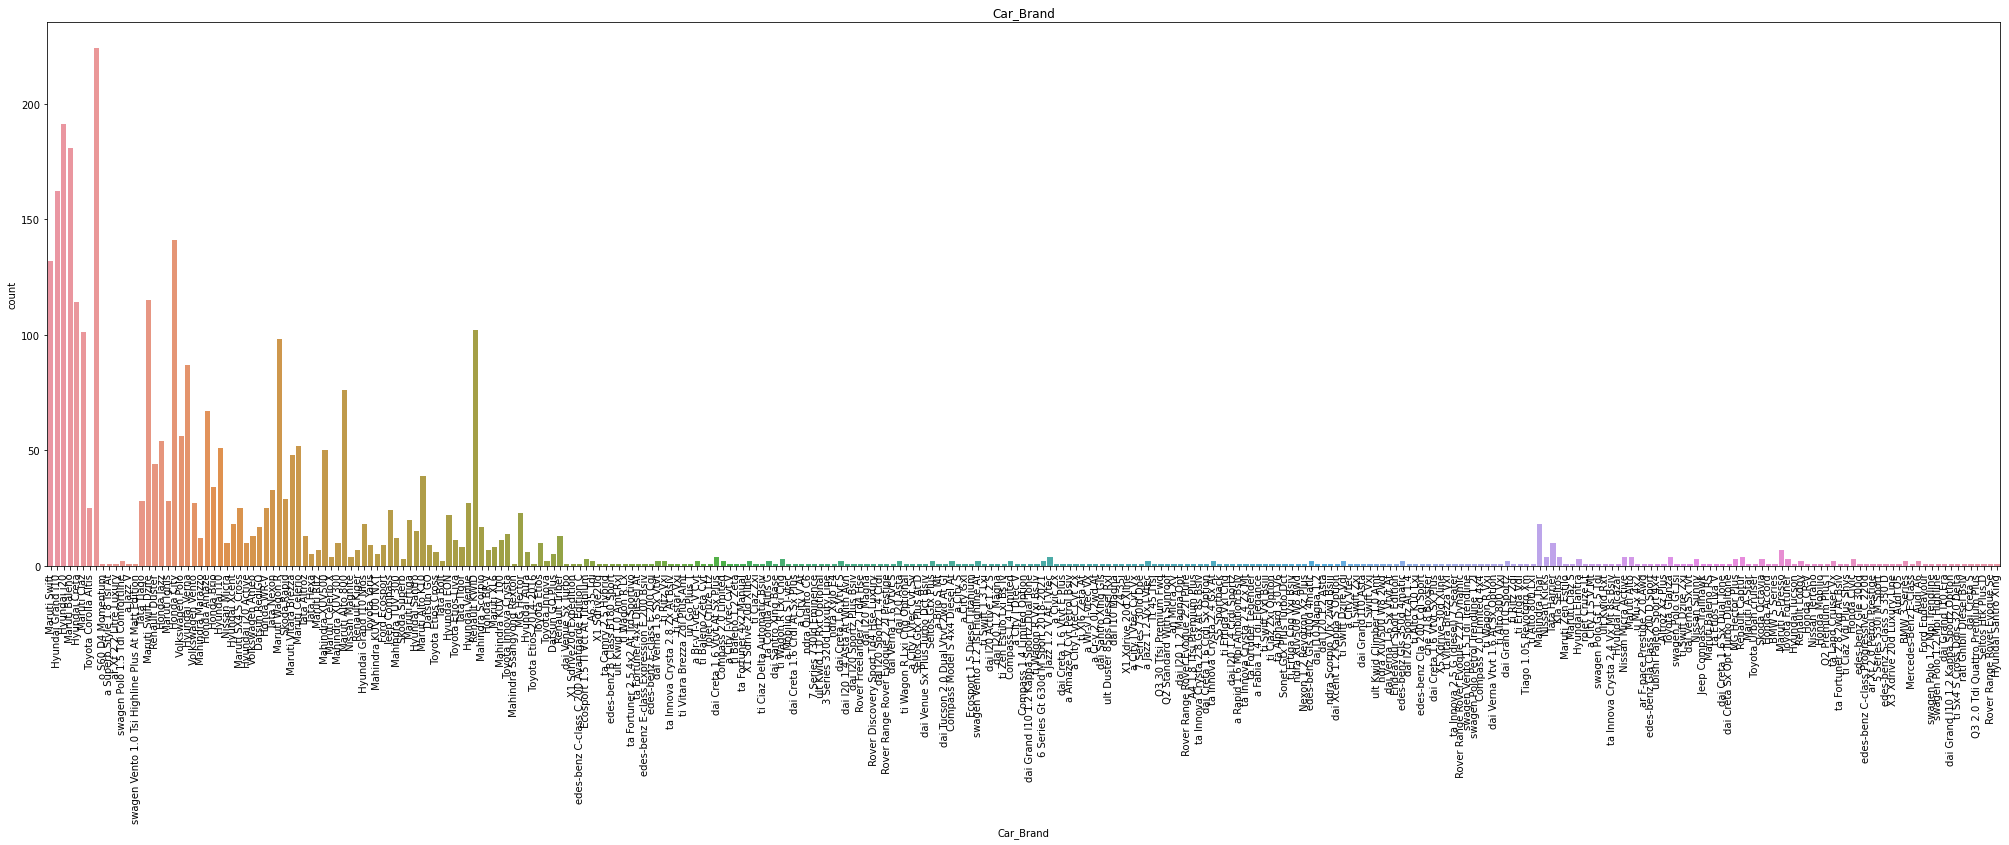

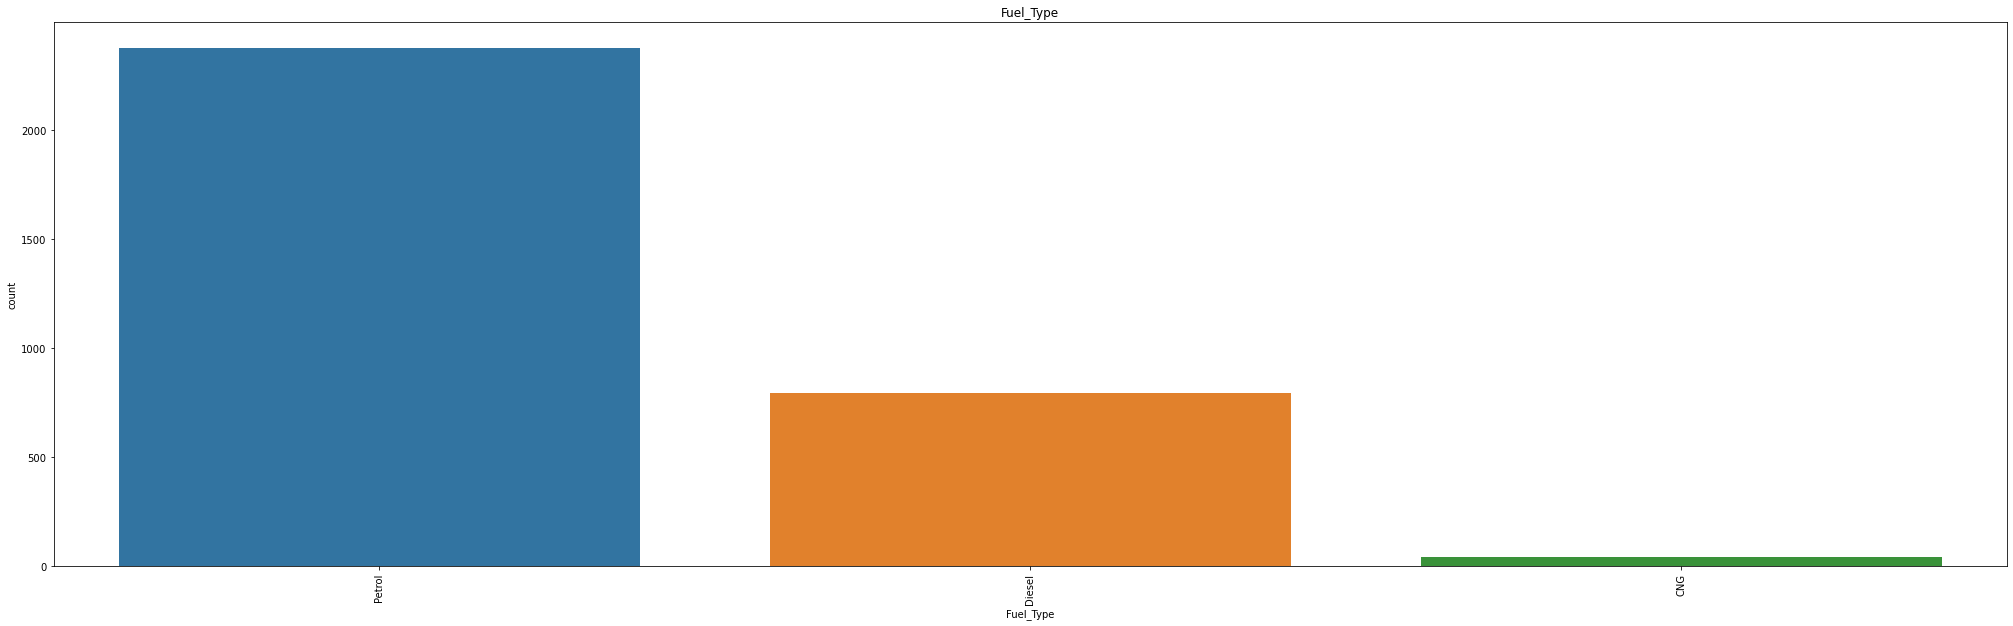

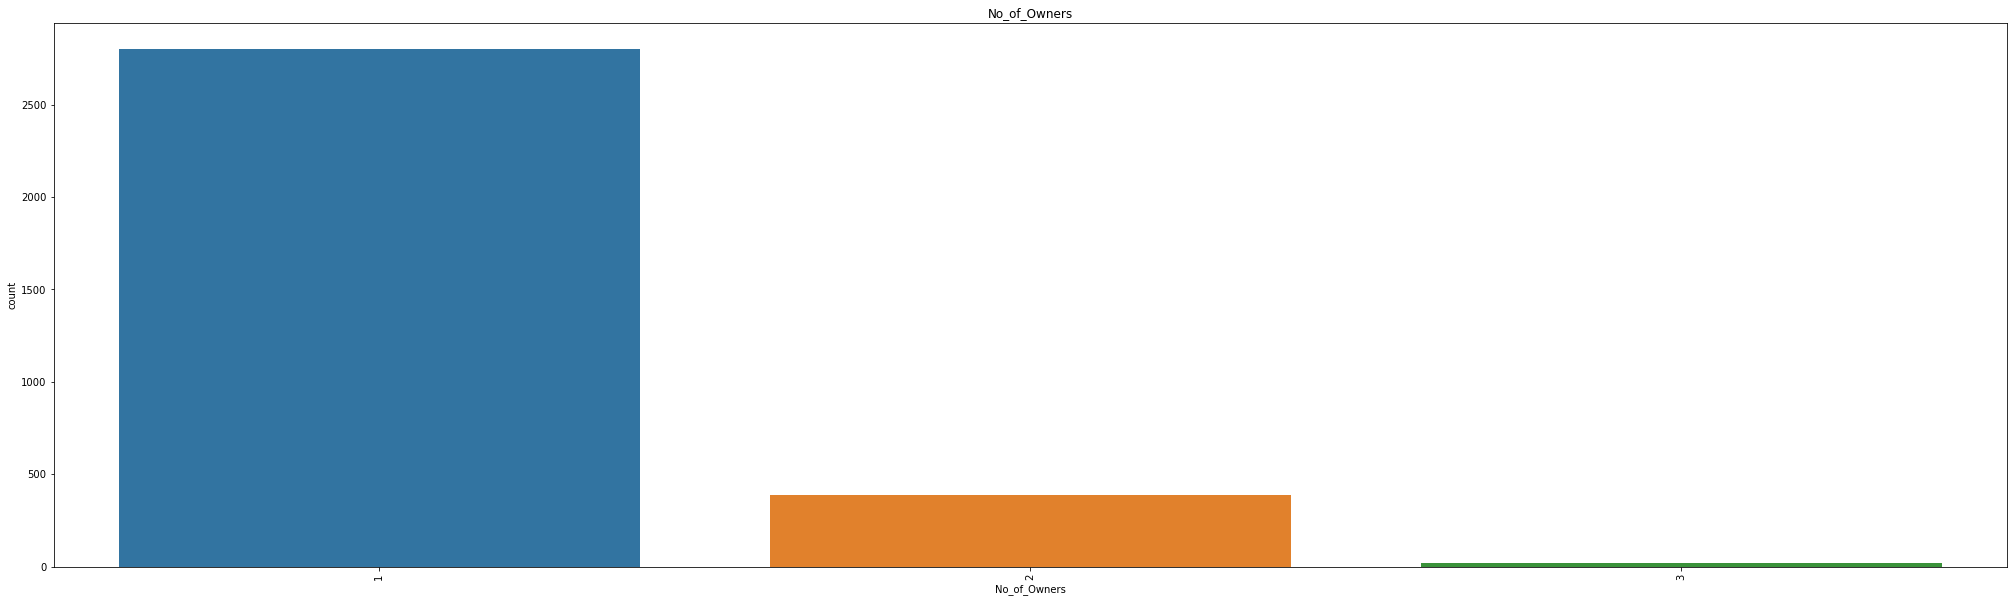

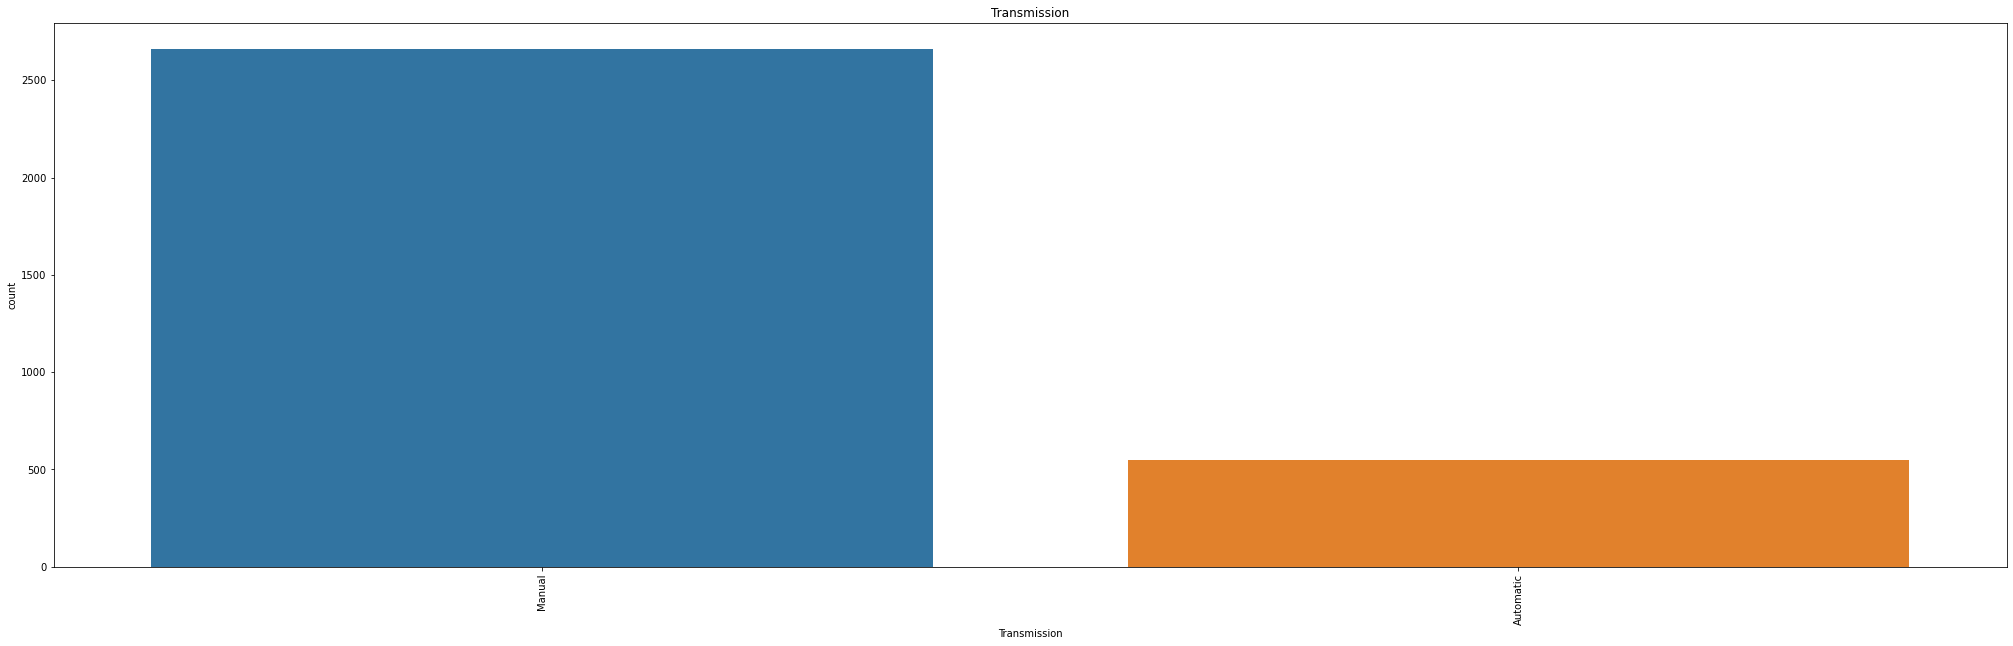

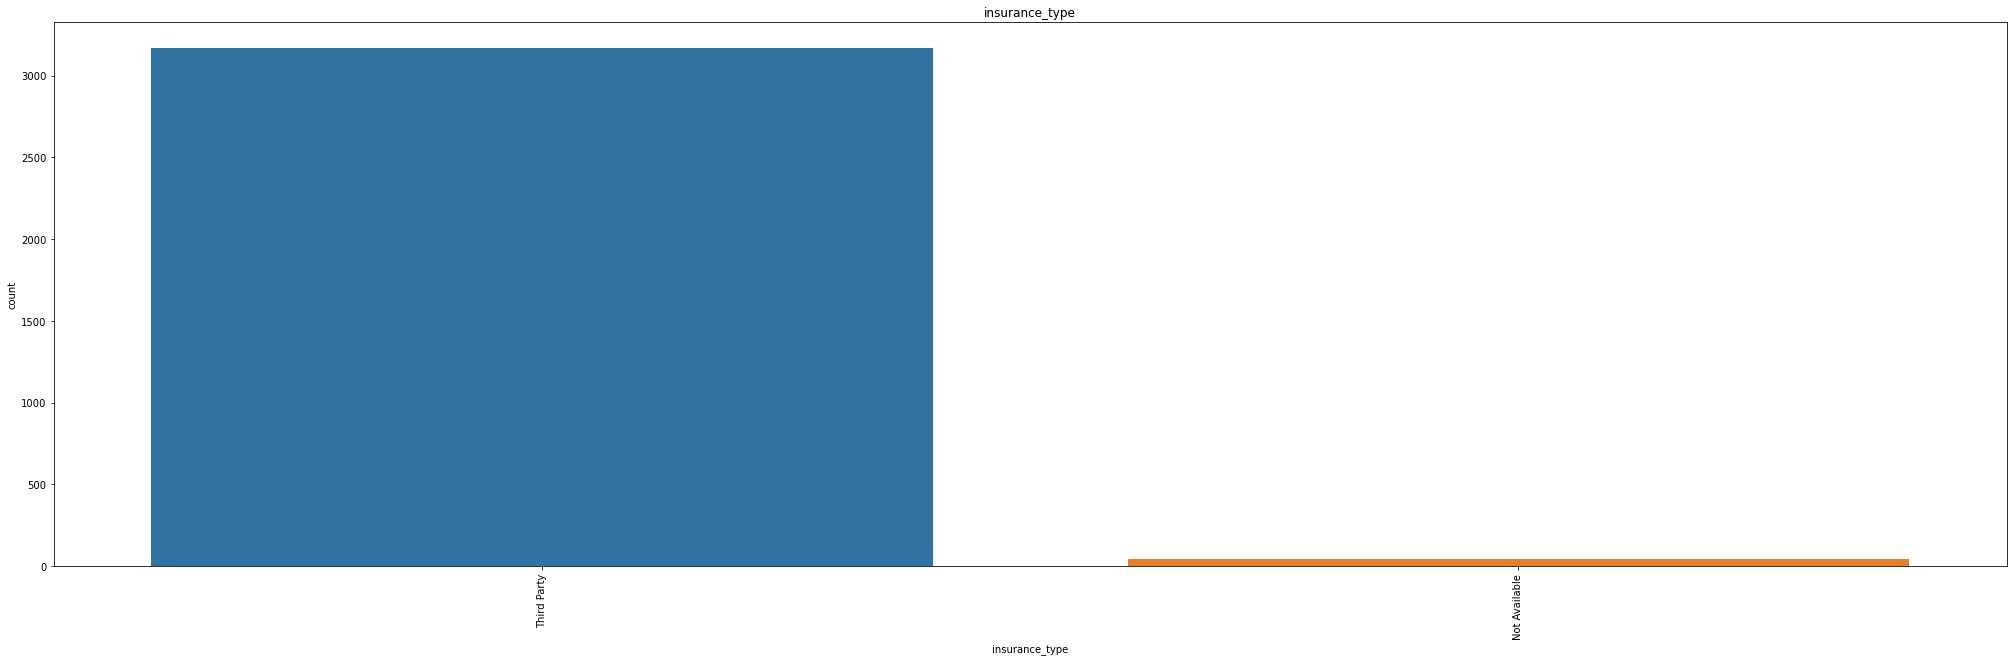

In [41]:
#Distribution plot for all categorical_columns
for i in df[categorical_columns]:              
    plt.figure(figsize = (35, 10))
    sns.countplot(x= df[i], data= df)
    plt.title(i)
    plt.xticks(rotation=90);
    plt.show()

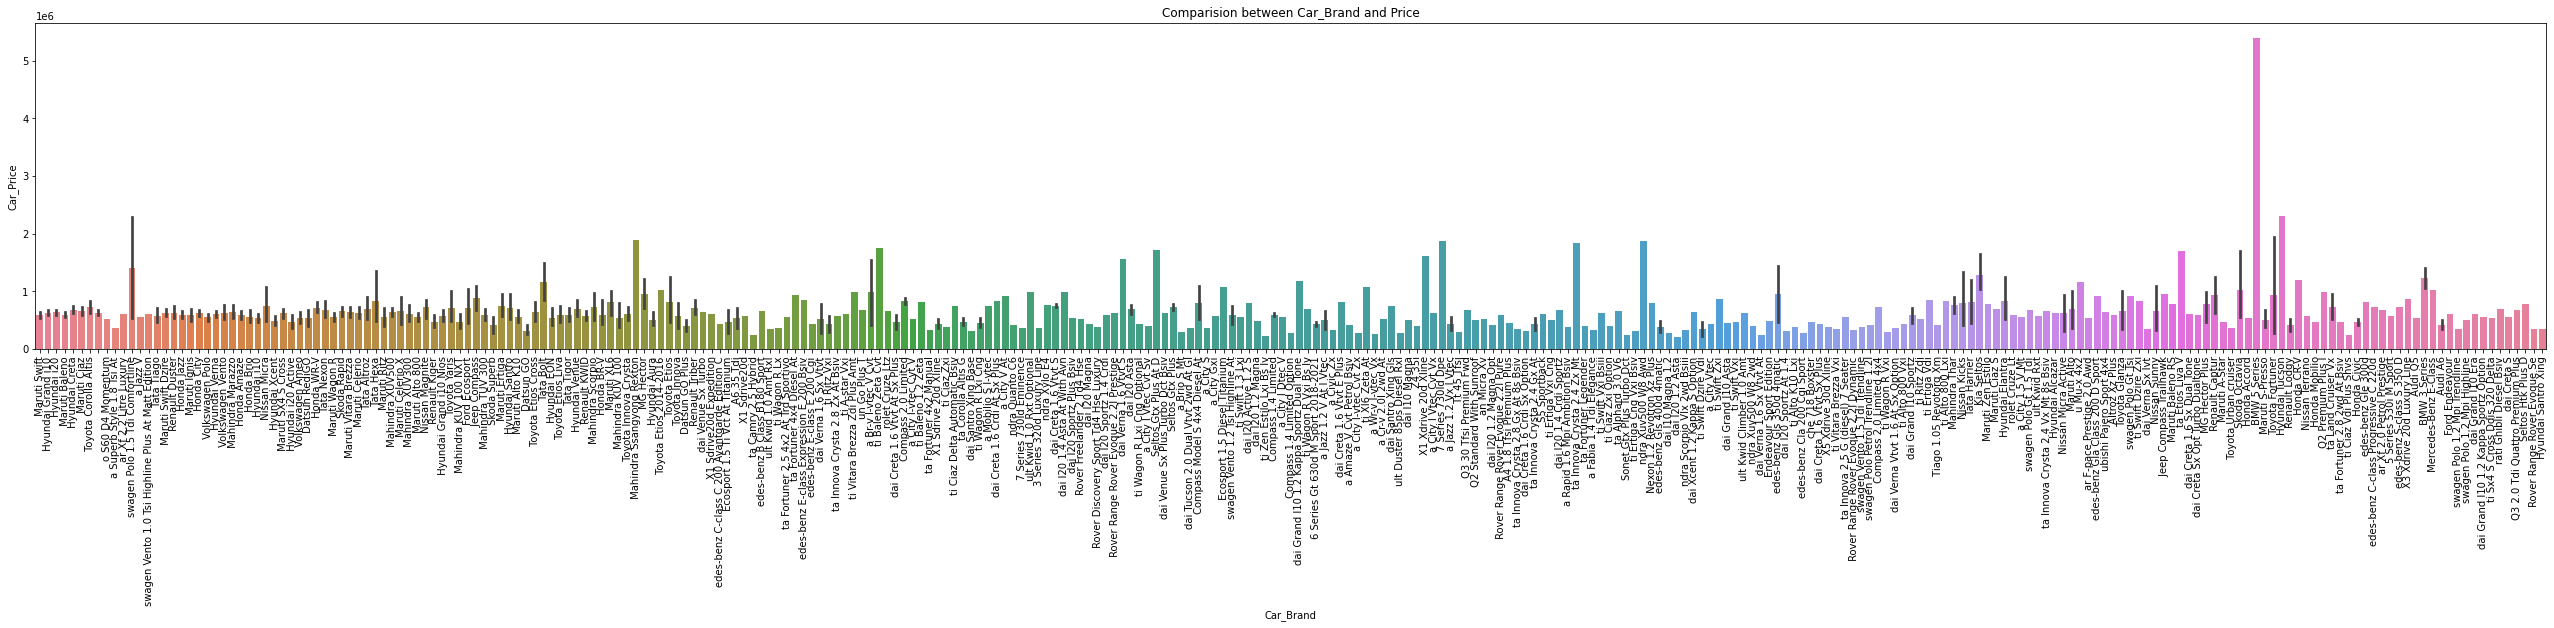

In [42]:
#Comparision between features using box plot
plt.figure(figsize=[45,6])
plt.title('Comparision between Car_Brand and Price')
sns.barplot(df['Car_Brand'],df['Car_Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

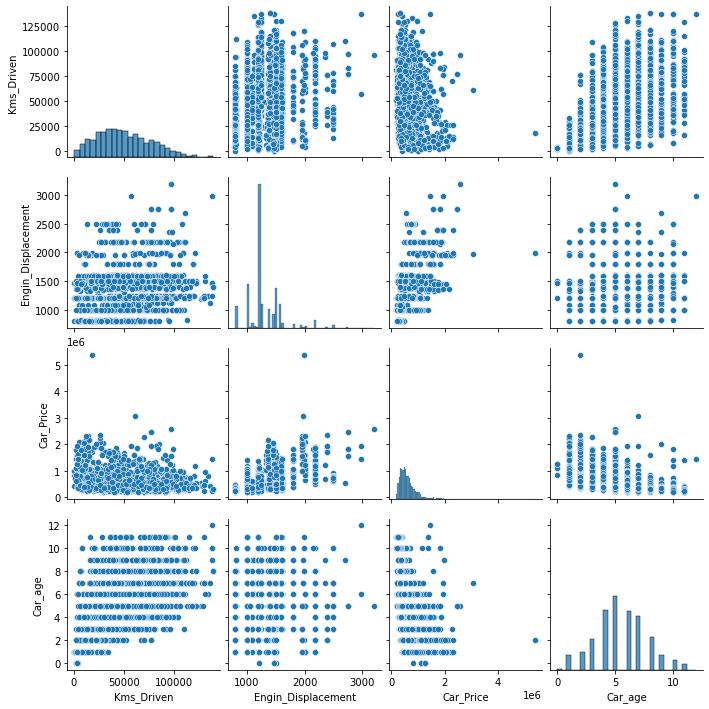

In [43]:
sns.pairplot(df)

Kms_Driven               AxesSubplot(0.125,0.749828;0.133621x0.130172)
Engin_Displacement    AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Car_Price              AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Car_age               AxesSubplot(0.606034,0.749828;0.133621x0.130172)
dtype: object

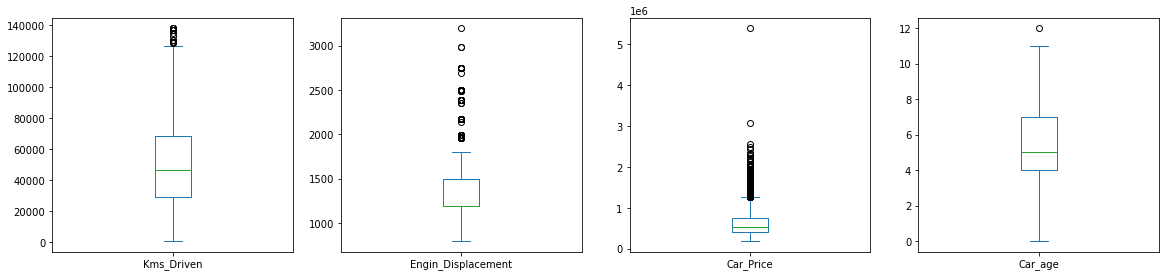

In [44]:
# to check outliers in the dataset
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(25,25))

outliers are present in Kms_Driven,Engin_Displacement,Car_age and Car_Price. however, outliers of Car_Price will not be romoved as it is our target column.

Removing Outliers:

IQR method:


In [45]:
#Features having outliers
features=df[['Kms_Driven','Engin_Displacement','Car_age']]

In [46]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [47]:
#Checking shape of new dataset
df_1.shape

(3012, 9)

In [48]:
#Checking dataloss in IQR method
Dataloss = (((3210-3012)/3210)*100)
Dataloss

6.16822429906542

Kms_Driven               AxesSubplot(0.125,0.749828;0.133621x0.130172)
Engin_Displacement    AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Car_Price              AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Car_age               AxesSubplot(0.606034,0.749828;0.133621x0.130172)
dtype: object

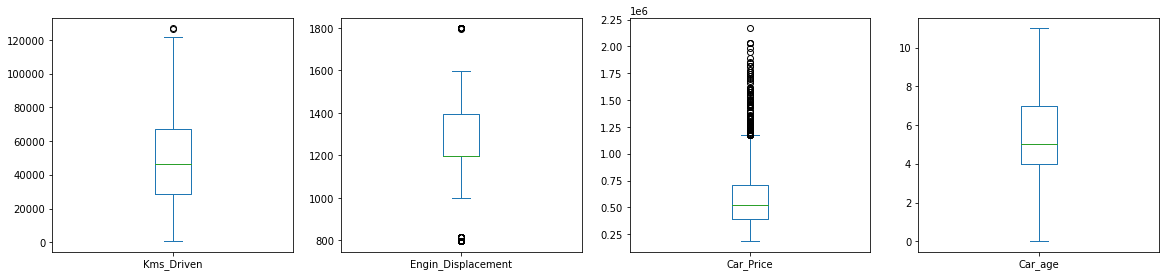

In [49]:
# to check outliers in the dataset
df_1.plot(kind='box',subplots=True,layout=(5,5),figsize=(25,25))

In [50]:
#Checking for skewness
df_1.skew()

Kms_Driven            0.398123
Engin_Displacement    0.048754
No_of_Owners          2.610963
Car_Price             1.603760
Car_age               0.115951
dtype: float64

In [51]:
# Separating categorical columns in df_1
cat_col=[]
for i in df_1.dtypes.index:
    if df_1.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Car_Brand', 'Fuel_Type', 'No_of_Owners', 'Transmission', 'insurance_type']


In [52]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_1[cat_col]= df_1[cat_col].apply(LE.fit_transform)

In [53]:
df_1[cat_col].head()

,Car_Brand,Fuel_Type,No_of_Owners,Transmission,insurance_type
0,71,2,0,1,1
1,33,2,0,1,1
2,41,2,0,1,1
3,60,1,0,1,1
4,33,2,0,1,1


In [54]:
df_1.corr()

,Car_Brand,Fuel_Type,Kms_Driven,Engin_Displacement,No_of_Owners,Transmission,insurance_type,Car_Price,Car_age
Car_Brand,1.000000,-0.029403,0.016777,-0.025563,0.030817,0.022698,0.002110,-0.036390,-0.018403
Fuel_Type,-0.029403,1.000000,-0.397734,-0.219828,0.054043,-0.072606,0.115130,-0.083727,-0.046163
Kms_Driven,0.016777,-0.397734,1.000000,0.243900,0.067518,0.065310,-0.118001,-0.224928,0.500935
Engin_Displacement,-0.025563,-0.219828,0.243900,1.000000,0.065224,-0.143638,-0.024176,0.537670,0.098977
No_of_Owners,0.030817,0.054043,0.067518,0.065224,1.000000,-0.101487,-0.006020,-0.102386,0.176294
Transmission,0.022698,-0.072606,0.065310,-0.143638,-0.101487,1.000000,-0.028696,-0.337902,0.132118
insurance_type,0.002110,0.115130,-0.118001,-0.024176,-0.006020,-0.028696,1.000000,0.072185,-0.081679
Car_Price,-0.036390,-0.083727,-0.224928,0.537670,-0.102386,-0.337902,0.072185,1.000000,-0.553551
Car_age,-0.018403,-0.046163,0.500935,0.098977,0.176294,0.132118,-0.081679,-0.553551,1.000000


<AxesSubplot:>

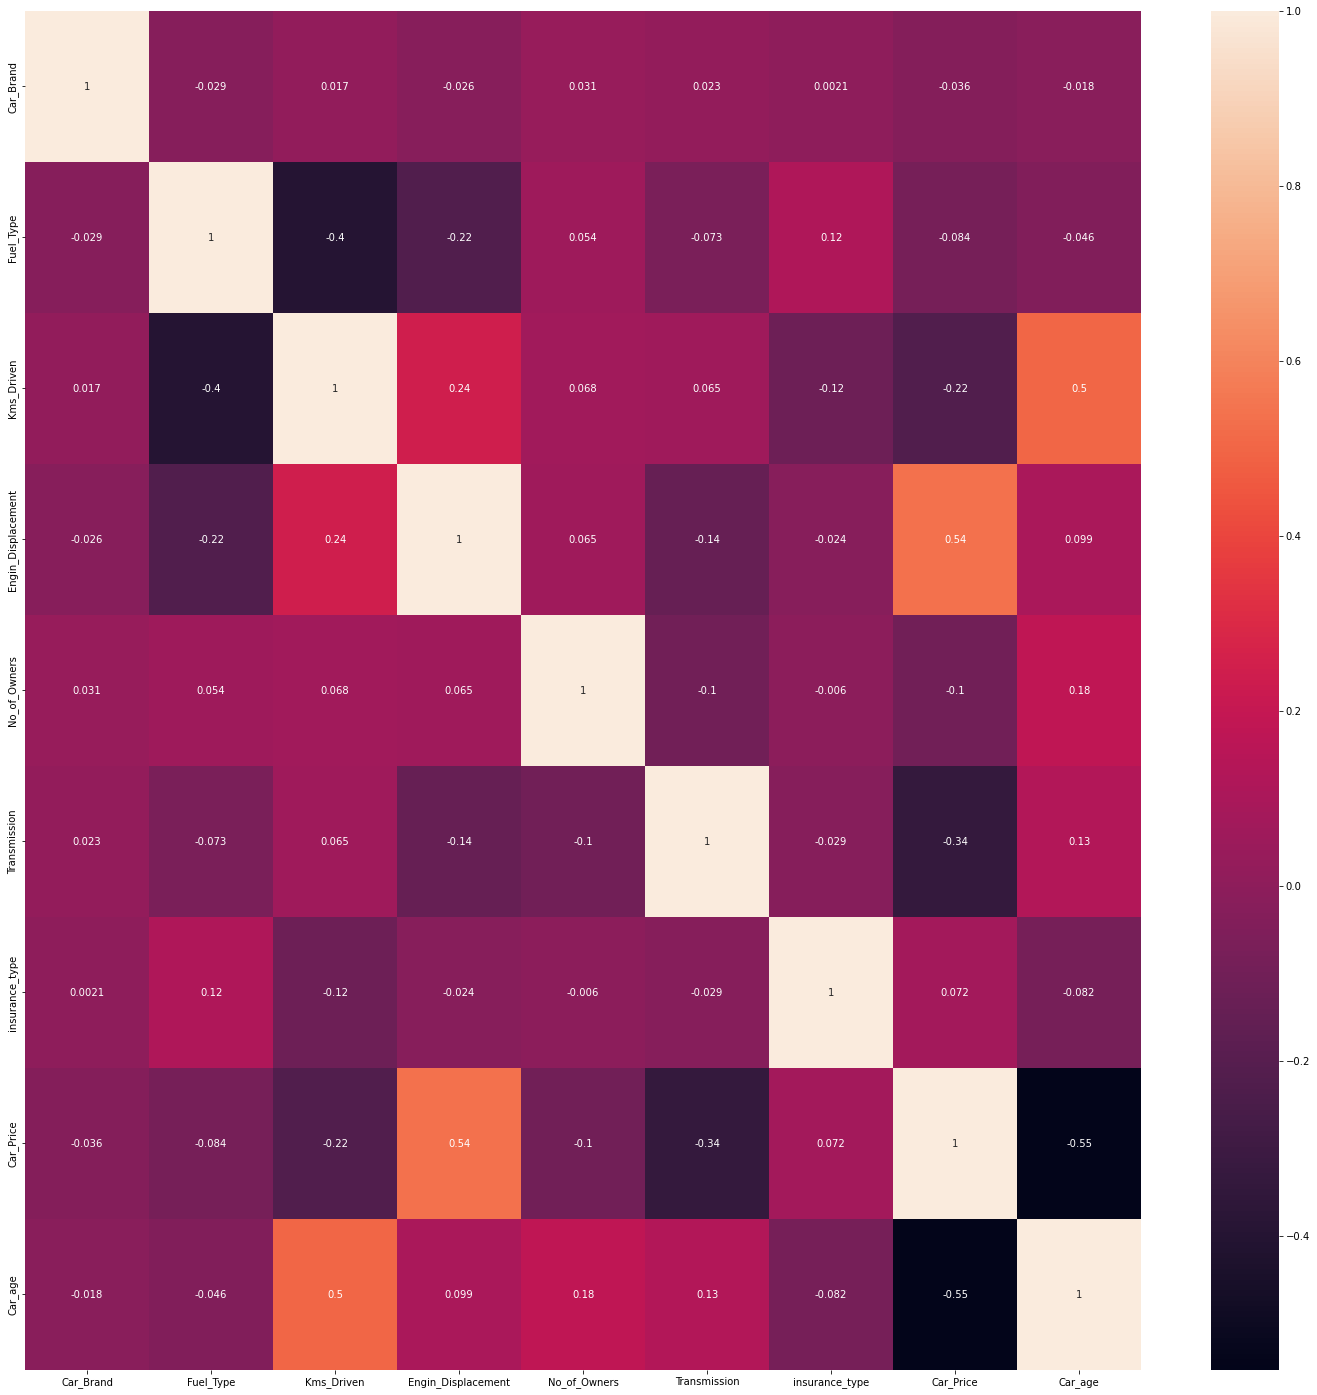

In [55]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,25))
sns.heatmap(df_1.corr(),color ='k',annot=True)

In [56]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df1 = pd.DataFrame(scaler.fit_transform(df_1), columns=df_1.columns)

In [57]:
df1.head()

,Car_Brand,Fuel_Type,Kms_Driven,Engin_Displacement,No_of_Owners,Transmission,insurance_type,Car_Price,Car_age
0,0.172601,0.505366,-1.008920,-0.210441,-0.368246,0.448282,0.116013,-0.506475,1.150390
1,-0.621931,0.505366,0.581617,-0.210441,-0.368246,0.448282,0.116013,-0.458670,-0.222965
2,-0.454661,0.505366,-0.744919,-0.210441,-0.368246,0.448282,0.116013,0.012019,-0.680750
3,-0.057395,-1.713530,0.139515,0.028425,-0.368246,0.448282,0.116013,0.092918,-0.222965
4,-0.621931,0.505366,-0.710978,-0.210441,-0.368246,0.448282,0.116013,-0.256421,-0.222965


In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif["Features"]=df1.columns
vif

,vif_Features,Features
0,1.006915,Car_Brand
1,1.285939,Fuel_Type
2,1.716838,Kms_Driven
3,2.262983,Engin_Displacement
4,1.067096,No_of_Owners
5,1.185112,Transmission
6,1.024984,insurance_type
7,3.352926,Car_Price
8,2.390644,Car_age


# MODEL BUILDING FROM DATASET:

In [59]:
# to separate target column
x = df1.drop("Car_Price",axis=1)
y = df1["Car_Price"]

In [60]:
x

,Car_Brand,Fuel_Type,Kms_Driven,Engin_Displacement,No_of_Owners,Transmission,insurance_type,Car_age
0,0.172601,0.505366,-1.008920,-0.210441,-0.368246,0.448282,0.116013,1.150390
1,-0.621931,0.505366,0.581617,-0.210441,-0.368246,0.448282,0.116013,-0.222965
2,-0.454661,0.505366,-0.744919,-0.210441,-0.368246,0.448282,0.116013,-0.680750
3,-0.057395,-1.713530,0.139515,0.028425,-0.368246,0.448282,0.116013,-0.222965
4,-0.621931,0.505366,-0.710978,-0.210441,-0.368246,0.448282,0.116013,-0.222965
...,...,...,...,...,...,...,...,...
3007,0.988042,-1.713530,0.874023,-0.912988,-0.368246,0.448282,0.116013,-0.222965
3008,0.235328,0.505366,1.525494,-1.142487,-0.368246,0.448282,0.116013,0.692605
3009,0.172601,-1.713530,0.665074,0.028425,-0.368246,0.448282,0.116013,0.234820
3010,0.967134,0.505366,-1.357105,-0.205757,-0.368246,-2.230738,0.116013,-1.138535


In [61]:
y

0      -0.506475
1      -0.458670
2       0.012019
3       0.092918
4      -0.256421
          ...   
3007   -0.738142
3008   -0.955100
3009   -0.469702
3010    0.703343
3011   -0.910973
Name: Car_Price, Length: 3012, dtype: float64

In [62]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [63]:
# to find best random state
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9020738095726543  on Random_state  151


In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [65]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from xgboost import XGBRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

# i) RandomForestRegressor:

In [66]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.9064014835332388
mean_squared_error: 0.10069329931982803
mean_absolute_error: 0.22849849148210455
root_mean_squared_error: 0.3173220750591235


# ii) ExtraTreeRegressor:

In [68]:
ETR=ExtraTreesRegressor()
ETR.fit(x_train,y_train)
pred=ETR.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8905243729364546
mean_squared_error: 0.11777389749601537
mean_absolute_error: 0.2212151014632698
root_mean_squared_error: 0.34318201802544285


# iii) Gradient Boosting:

In [69]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred=GBR.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8637792553218463
mean_squared_error: 0.14654629939907454
mean_absolute_error: 0.2767848259150424
root_mean_squared_error: 0.3828136614582538


# iv) DecisionTreeRegressor:

In [70]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred=DTR.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8154352697607928
mean_squared_error: 0.1985547669706872
mean_absolute_error: 0.27130444807385096
root_mean_squared_error: 0.4455948462119902


# v) XGB Regressor:

In [71]:
XGB=XGBRegressor()
XGB.fit(x_train,y_train)
pred=XGB.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8997605237546215
mean_squared_error: 0.1078376449355699
mean_absolute_error: 0.2309362790060536
root_mean_squared_error: 0.32838642623526615


# Cross Validation Score:

In [72]:
print(cross_val_score(RFR,x,y,cv=5).mean())

0.8841046350329853


In [73]:
print(cross_val_score(ETR,x,y,cv=5).mean())

0.882184467694594


In [74]:
print(cross_val_score(GBR,x,y,cv=5).mean())

0.8417765592972728


In [75]:
print(cross_val_score(DTR,x,y,cv=5).mean())

0.8200145228044647


In [76]:
print(cross_val_score(XGB,x,y,cv=5).mean())

0.8824793479801668


# Hyper Parameter Tuning:

In [77]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [78]:
# parameter of XGBRegresssor
parameter = {'gamma':np.arange(0,0.5,0.1),
             'n_estimators':[10,100,1000],
             'max_depth': [2,4,6,8,10],
              'n_jobs':[-2,-1,1,2]}

In [79]:
GCV=GridSearchCV(XGBRegressor(verbosity=0),parameter,cv=5)

In [80]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...lta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'gamma': array([0. , 0.1, 0.2, 0.3, 0.4]),
                         'max_depth': [2, 4, 6, 8, 10],
                         'n_estimators': [10, 100, 1000],
                         'n_jobs': [-2, -1, 1, 2]})

In [81]:
GCV.best_params_

{'gamma': 0.2, 'max_depth': 8, 'n_estimators': 100, 'n_jobs': -2}

In [82]:
Best_mod=XGBRegressor(gamma=0.2,max_depth=8,n_estimators=100,n_jobs=-2)
Best_mod.fit(x_train,y_train)
pred=Best_mod.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 90.1869737579966
mean_squared_error: 0.10556855235737327
mean_absolute_error: 0.2364189983145356
RMSE value: 0.32491314586728137


# Saving the model

In [83]:
# Saving the model using .pkl
import joblib
joblib.dump(Best_mod,"Used_cars_Price.pkl")

['Used_cars_Price.pkl']

In [84]:
# Loading the saved model
model=joblib.load("Used_cars_Price.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([-9.72316265e-01,  1.10022342e+00,  3.32979083e-01, -1.08683479e+00,
       -1.07937944e+00,  9.31777835e-01,  3.33906591e-01, -3.25094044e-01,
        1.39367670e-01, -1.10919559e+00,  1.00550115e+00,  1.05148172e+00,
       -2.29448825e-01,  5.39388895e-01, -4.46511388e-01, -5.01651108e-01,
       -8.84381294e-01,  2.17223659e-01, -4.64281321e-01, -8.84381294e-01,
       -1.14840353e+00, -7.25906730e-01, -1.00942206e+00, -1.44144207e-01,
       -8.56487572e-01,  5.55743635e-01, -3.63541991e-01, -6.33505344e-01,
        3.97598553e+00, -8.25868964e-01, -1.50433421e-01, -6.48290098e-01,
        4.31941926e-01,  1.72539556e+00,  8.73383641e-01, -2.19303176e-01,
        2.74063796e-01, -7.98884988e-01, -1.08554445e-01,  2.11299562e+00,
        3.79954863e+00,  7.00912550e-02,  7.48750329e-01, -1.50497660e-01,
       -4.75558549e-01, -7.99009323e-01,  9.02374566e-01, -7.34834015e-01,
        4.92723137e-01, -2.19303176e-01, -2.02597603e-01, -6.54036582e-01,
        3.63371998e-01,  

In [85]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,894,895,896,897,898,899,900,901,902,903
Predicted,-0.972316,1.100223,0.332979,-1.086835,-1.079379,0.931778,0.333907,-0.325094,0.139368,-1.109196,...,-0.219303,0.090386,-0.365179,0.043623,1.334756,2.453351,-0.452733,2.038315,-0.531546,1.171417
Actual,-1.245604,1.126228,0.291490,-1.083804,-1.249281,0.368713,0.791597,-0.366739,-0.182876,-0.513829,...,-0.050495,0.482708,0.137045,0.552576,1.251255,2.483137,-0.605761,2.703772,-0.120363,0.471676
